# Interpretive Structural Modelling (ISM)
Helge Glinvad Grøn

Source: Attri, R., Dev, N., & Sharma, V. (2013). Interpretive structural modelling (ISM) approach: an overview. Research journal of management sciences, 2319(2), 1171.

[HER](https://scholar.google.com/scholar?hl=en&as_sdt=2005&sciodt=0%2C5&cites=1641285370802825202&scipsc=&q=Interpretive+Structural+Modelling+%28ISM%29+approach%3A+An+Overview&btnG=)

Example: H. Singh and J. Khamba, ‘An Interpretive Structural Modelling (ISM) approach for Advanced Manufacturing Technologies (AMTs) utilisation barriers’, Int. J. of Mechatronics and Manufacturing Systems, vol. 4, pp. 35–48, Jan. 2011, doi: 10.1504/IJMMS.2011.037998.

[Youtube Lecture](https://www.youtube.com/watch?v=EMJq-UJNXwg&t=388s)


## Import & Functions

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
#from matplotlib.collections import LineCollection 
#from mpl_toolkits.mplot3d import Axes3D  # Must be imported to plot in 3D
#import configparser
import time
import os
import doctest
import random
import csv
import sys
import io

import graphviz
from IPython.display import Image, display

import networkx as nx
import roman
import docx

from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.enum.table import WD_ALIGN_VERTICAL


In [75]:
def convert_to_roman(num):
    # Define Roman numeral symbols and their corresponding values
    roman_symbols = {
        1000: 'M',
        900: 'CM',
        500: 'D',
        400: 'CD',
        100: 'C',
        90: 'XC',
        50: 'L',
        40: 'XL',
        10: 'X',
        9: 'IX',
        5: 'V',
        4: 'IV',
        1: 'I'
    }

    roman_numeral = ''
    for value, symbol in roman_symbols.items():
        while num >= value:
            roman_numeral += symbol
            num -= value

    return roman_numeral

## START HERE: Structural Self-Interaction Matrix (SSIM)

In [76]:
#INPUTS##############################################################################################################################
#### INSTRUCTION
# O: Barriers i and j are unrelated 	
# X: Barriers i and j will help to achieve or exceed each other 	
# Y: Barrier i will help to achieve or exceed barrier j 	
# Z: Barrier j will help to achieve or exceed barrier i.	



##Example
# SSIM = [
#      ['O', 'X', 'Z', 'Z', 'X', 'Z', 'Y'] ,
#      [0, 'O', 'Z', 'Z', 'O', 'X', 'Z'] ,
#      [0, 0, 'O', 'X', 'O', 'X', 'X'] ,
#      [0, 0, 0, 'O', 'Y', 'X', 'Y'] ,
#      [0, 0, 0, 0, 'O', 'X', 'X'] ,
#      [0, 0, 0, 0, 0, 'O', 'Z'] ,
#      [0, 0, 0, 0, 0, 0, 'O'] ,
# ]

##Iteration III 
SSIM = [
     ['O', 'X', 'Z', 'X', 'X', 'Z', 'Z'] ,
     [0, 'O', 'X', 'X', 'O', 'Z', 'Z'] ,
     [0, 0, 'O', 'X', 'X', 'X', 'X'] ,
     [0, 0, 0, 'O', 'O', 'O', 'O'] ,
     [0, 0, 0, 0, 'O', 'Y', 'X'] ,
     [0, 0, 0, 0, 0, 'O', 'Y'] ,
     [0, 0, 0, 0, 0, 0, 'X'] ,
]

topics_array = [
   "Topic title 1",
   "Topic title 2",
   "Topic title 3",
   "Topic title 4",
   "Topic title 5",
   "Topic title 6",
   "Topic title 7"]

####################################################################################################################################

rows = len(SSIM)
cols = len(SSIM[0])

for i in range(rows):
    for j in range(cols):
        if SSIM[i][j] == 0:
            if SSIM[j][i] == "X":
                SSIM[i][j] = "X"
            elif SSIM[j][i] == "O":
                SSIM[i][j] = "O"
            elif SSIM[j][i]  == "Y":
                SSIM[i][j] = "Z"
            elif SSIM[j][i]  == "Z":
                SSIM[i][j] = "Y"

print("Updated SSIM:")
for row in SSIM:
    for element in row:
        print(element, end=" ")
    print()

Updated SSIM:
O X Z X X Z Z 
X O X X O Z Z 
Y X O X X X X 
X X X O O O O 
X O X O O Y X 
Y Y X O Z O Y 
Y Y X O X Z X 


In [77]:
# Create a new Word document
doc = docx.Document()

# Add a table with the same dimensions as SSIM
rows = len(SSIM)
cols = len(SSIM[0])
table = doc.add_table(rows, cols)

# Populate the table with SSIM values
for i in range(rows):
    for j in range(cols):
        cell = table.cell(i, j)
        cell.text = str(SSIM[i][j])

# Save the document to a file
doc.save("SSIM_Table.docx")

print("SSIM table has been created and saved as 'SSIM_Table.docx'.")


SSIM table has been created and saved as 'SSIM_Table.docx'.


## Reachability Matrix

In [78]:
## Instructions:
# If the (i, j) entry in the SSIM is O, then (i, j) entries in the reachability matrix become 0 
# If the (i, j) entry in the SSIM is X, then (i, j) entries in the reachability matrix become 1
# If the (i, j) entry in the SSIM is Y, then (i, j) entries in the reachability matrix become 1
# If the (i, j) entry in the SSIM is Z, then (i, j) entries in the reachability matrix become 0 

Reachability_Matrix = []

# Original matrix
for row in SSIM:
    new_row = []
    row_sum = 0
    for element in row:
        if element == "O":
            new_row.append(0)
        elif element == "X":
            new_row.append(1)
        elif element == "Y":
            new_row.append(1)
        elif element == "Z":
            new_row.append(0)
        row_sum += new_row[-1]
    new_row.append("")   # Adding an empty cell after the last entry in each row
    new_row.append(row_sum)   # Adding the sum of the row as the last cell in each row
    Reachability_Matrix.append(new_row)

# Empty row
Reachability_Matrix.append([""] * (len(SSIM[0]) + 2))   # Adding 2 additional cells for the empty row

# Column sum row
column_sums = [0] * len(Reachability_Matrix[0])
for row in Reachability_Matrix:
    for i, element in enumerate(row):
        if isinstance(element, int):
            column_sums[i] += element

Reachability_Matrix.append(column_sums[:-2])   # Exclude the last two cells from the column sums

print("Conical form of Reachability Matrix:\n")
for row in Reachability_Matrix:
    for element in row:
        print(element, end=" ")
    print()

Conical form of Reachability Matrix:

0 1 0 1 1 0 0  3 
1 0 1 1 0 0 0  3 
1 1 0 1 1 1 1  6 
1 1 1 0 0 0 0  3 
1 0 1 0 0 1 1  4 
1 1 1 0 0 0 1  4 
1 1 1 0 1 0 1  5 
         
6 5 5 3 3 2 4 


In [79]:
import csv

# Your existing code to generate Reachability_Matrix goes here

# Specify the filename for the output CSV file
output_file = "reachability_matrix.csv"

# Write the Reachability_Matrix to the CSV file
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write each row from Reachability_Matrix to the CSV file
    for row in Reachability_Matrix:
        writer.writerow(row)

print(f"Conical form of Reachability Matrix written to {output_file}")

import csv

# Read CSV data
csv_file = 'reachability_matrix.csv'  # Change to your CSV file path
data = []
with open(csv_file, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        data.append(row)

# Create a new Word document
doc = Document()

# Create a table
num_rows = len(data)
num_cols = len(data[0])
table = doc.add_table(rows=num_rows, cols=num_cols)

# Populate the table with CSV data
for r, row in enumerate(data):
    for c, cell in enumerate(row):
        table.cell(r, c).text = cell

# Customize table appearance (optional)
for row in table.rows:
    for cell in row.cells:
        cell.paragraphs[0].alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
        cell.vertical_alignment = WD_ALIGN_VERTICAL.CENTER

# Save the Word document
doc_file = 'reachability_matrix.docx'  # Change to your desired file path
doc.save(doc_file)

print(f"CSV data inserted into Word table and saved as {doc_file}")


Conical form of Reachability Matrix written to reachability_matrix.csv


CSV data inserted into Word table and saved as reachability_matrix.docx


### Seperating the Driver and Depence Powers & plotting it

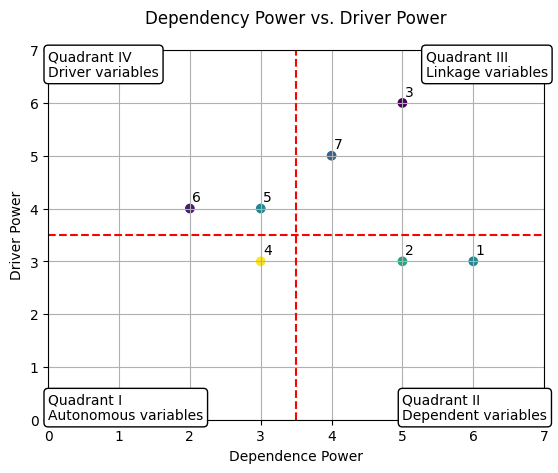

In [80]:
Driver_Depence_Power_matrix=[]

# Read the last row into a list
Driver_Power = [DPcolumn for DPcolumn in Reachability_Matrix[-1] if DPcolumn != ""]
# print (Driver_Power)

# Read the last column into a list
Dependence_Power = [DProw[-1] for DProw in Reachability_Matrix if DProw[-1] != ""]
# print (Dependence_Power)

Driver_Depence_Power_matrix = [[dr, dp] for dr, dp in zip(Driver_Power, Dependence_Power)]

# Print the merged matrix
#for row in Driver_Depence_Power_matrix:
#    print(row)


# Extract x and y values from the merged matrix
x_values = [row[0] for row in Driver_Depence_Power_matrix]
y_values = [row[1] for row in Driver_Depence_Power_matrix]



# Plot the x and y values
plt.scatter(x_values, y_values, c=[random.random() for _ in range(len(x_values))])

plt.xlabel('Dependence Power')
plt.ylabel('Driver Power')
plt.title('Dependency Power vs. Driver Power', y=1.05)
plt.xlim(0, len(SSIM))
plt.ylim(0, len(SSIM))
plt.grid(True)

# Get the x and y limits
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

# Calculate the middle x and y values
x_middle = (x_min + x_max) / 2
y_middle = (y_min + y_max) / 2

# Draw the horizontal and vertical lines
plt.axhline(y_middle, color='red', linestyle='--')
plt.axvline(x_middle, color='red', linestyle='--')


# Label each point
for i, (x, y) in enumerate(zip(x_values, y_values)):
    plt.annotate(str(i+1), (x, y), textcoords="offset points", xytext=(5, 5), ha='center')

# Add text boxes
plt.text(x_min, y_min, 'Quadrant I\nAutonomous variables', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
plt.text(x_max-2, y_min, 'Quadrant II\nDependent variables', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
plt.text(x_max-1.67, y_max-0.5, 'Quadrant III\nLinkage variables', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
plt.text(x_min, y_max-0.5, 'Quadrant IV\nDriver variables', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Add this line to save the plot to a high-resolution PNG file
plt.savefig('Dependency_Power_vs_Driver_Power.png', dpi=600)  # Adjust the filename and DPI as needed

plt.show()

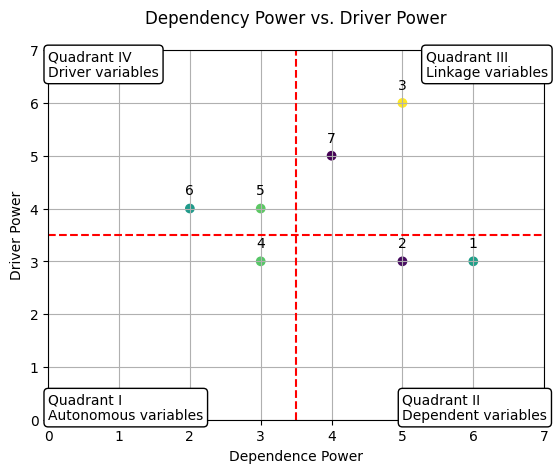

In [81]:
## fix for 4+6
from matplotlib.patches import Ellipse

Driver_Depence_Power_matrix=[]

# Read the last row into a list
Driver_Power = [DPcolumn for DPcolumn in Reachability_Matrix[-1] if DPcolumn != ""]
# print (Driver_Power)

# Read the last column into a list
Dependence_Power = [DProw[-1] for DProw in Reachability_Matrix if DProw[-1] != ""]
# print (Dependence_Power)

Driver_Depence_Power_matrix = [[dr, dp] for dr, dp in zip(Driver_Power, Dependence_Power)]

# Print the merged matrix
#for row in Driver_Depence_Power_matrix:
#    print(row)


# Extract x and y values from the merged matrix
x_values = [row[0] for row in Driver_Depence_Power_matrix]
y_values = [row[1] for row in Driver_Depence_Power_matrix]



# Plot the x and y values
plt.scatter(x_values, y_values, c=[random.random() for _ in range(len(x_values))])

plt.xlabel('Dependence Power')
plt.ylabel('Driver Power')
plt.title('Dependency Power vs. Driver Power', y=1.05)
plt.xlim(0, len(SSIM))
plt.ylim(0, len(SSIM))
plt.grid(True)

# Get the x and y limits
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

# Calculate the middle x and y values
x_middle = (x_min + x_max) / 2
y_middle = (y_min + y_max) / 2

# Draw the horizontal and vertical lines
plt.axhline(y_middle, color='red', linestyle='--')
plt.axvline(x_middle, color='red', linestyle='--')

for i, (x, y) in enumerate(zip(x_values, y_values)):
    plt.annotate(str(i+1), (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Label each point
#plt.annotate(str(1), (6, 3), textcoords="offset points", xytext=(7, 7), ha='center')
#plt.annotate(str(2), (5, 1), textcoords="offset points", xytext=(7, 7), ha='center')
#plt.annotate(str(3), (3, 5), textcoords="offset points", xytext=(7, 7), ha='center')
#plt.annotate("4,6", (3, 6), textcoords="offset points", xytext=(7, 7), ha='center')
#plt.annotate(str(5), (4, 3), textcoords="offset points", xytext=(7, 7), ha='center')
#plt.annotate(str(7), (4, 4), textcoords="offset points", xytext=(7, 7), ha='center')

# Add text boxes
plt.text(x_min, y_min, 'Quadrant I\nAutonomous variables', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
plt.text(x_max-2, y_min, 'Quadrant II\nDependent variables', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
plt.text(x_max-1.67, y_max-0.5, 'Quadrant III\nLinkage variables', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
plt.text(x_min, y_max-0.5, 'Quadrant IV\nDriver variables', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

## Adding cluster
#ellipse1 = Ellipse(xy=(3 , 5.5), width=1, height=2, edgecolor='none', facecolor='orange', alpha=0.2)
#ellipse2 = Ellipse(xy=(4 , 3.5), width=1, height=2, edgecolor='none', facecolor='gray', alpha=0.2)
#ellipse3 = Ellipse(xy=(5.5 , 2), width=1, height=3, angle=-25, edgecolor='none', facecolor='blue', alpha=0.2)
#plt.gca().add_patch(ellipse1)
#plt.gca().add_patch(ellipse2)
#plt.gca().add_patch(ellipse3)
#plt.text(2.75, 5.5, 'I', fontname='Times New Roman', fontweight='bold', fontsize=12)
#plt.text(3.75, 3.5, 'II', fontname='Times New Roman', fontweight='bold', fontsize=12)
#plt.text(5.5, 2, 'III', fontname='Times New Roman', fontweight='bold', fontsize=12)

# Add this line to save the plot to a high-resolution PNG file
plt.savefig('Dependency_Power_vs_Driver_Power_withCluster.png', dpi=600)  # Adjust the filename and DPI as needed

plt.show()

## Level partitions

In [82]:
Reachability_Matrix_Raw = [row[:-2] for row in Reachability_Matrix[:-2]]

# for row in Reachability_Matrix_Raw:
#     print(row)

Reachability_set = []
Antecedent_set = []

for i, row in enumerate(Reachability_Matrix_Raw):
    row_str = ','.join([str(j+1) for j, value in enumerate(row) if value == 1])
    Reachability_set.append(row_str)

for j in range(len(Reachability_Matrix_Raw[0])):
    column_str = ','.join([str(i+1) for i, row in enumerate(Reachability_Matrix_Raw) if row[j] == 1])
    Antecedent_set.append(column_str)

#print("Reachability_set:", Reachability_set)
#print("Antecedent_set:", Antecedent_set)

Intersection_set = []

for row, column in zip(Reachability_set, Antecedent_set):
    common_numbers = set()

    row_numbers = set(row.split(','))
    column_numbers = set(column.split(','))

    for number in row_numbers:
        if number in column_numbers:
            common_numbers.add(number)

    sorted_numbers = sorted(common_numbers, key=int)
    result_string = ','.join(sorted_numbers)
    Intersection_set.append(result_string)

#print("Intersection_set:", Intersection_set)
Intersection_set_draw = []
Intersection_set_draw =Intersection_set

## Calculating the Level
# Calculate the number of numerical entries in each string
entry_counts = [len(entry.split(',')) for entry in Intersection_set]

# Sort the entry counts in ascending order
sorted_counts = sorted(set(entry_counts))

# Assign ranks in descending order
level = [len(sorted_counts) - level + 1 for level, count in enumerate(sorted_counts, start=1)]

# Create an array to store the ranks
level_array = []

# Assign ranks to entries
for entry_count in entry_counts:
    level_array.append(convert_to_roman(level[sorted_counts.index(entry_count)]))

# Print the ranks
# for entry, level in zip(Intersection_set, level_array):
#     print(f"Entry: {entry}, level: {level}")

## making the table

# Determine the length of the arrays
length = min(len(Reachability_set), len(Antecedent_set), len(Intersection_set))

# Define the column widths
index_width = 35
column_width = 30

# Print the table separator
print(f"|{'-' * (index_width - 23)}|{'-' * (column_width + 22)}||{'-' * (column_width + 2)}|{'-' * (column_width + 2)}|{'-' * (column_width + 2)}|{'-' * (column_width + 2)}|")

# Print the table header
print(f"| {'Barrier':<{index_width - 25}} | {'Topics':<{index_width + 15}} || {'Reachability':<{column_width}} | {'Antecedent':<{column_width}} | {'Intersection':<{column_width}} | {'Level':<{column_width}} |")

# Print the table separator
print(f"|{'-' * (index_width - 23)}|{'-' * (column_width + 22)}||{'-' * (column_width + 2)}|{'-' * (column_width + 2)}|{'-' * (column_width + 2)}|{'-' * (column_width + 2)}|")

# Iterate over the indices and print the entries from the arrays
for i in range(length):
    print(f"| {i+1:<{index_width - 25}} | {topics_array[i]:<{index_width + 15}} || {Reachability_set[i]:<{column_width}} | {Antecedent_set[i]:<{column_width}} | {Intersection_set[i]:<{column_width}} | {level_array[i]:<{column_width}} | ")

# Print the table separator
print(f"|{'-' * (index_width - 23)}|{'-' * (column_width + 22)}||{'-' * (column_width + 2)}|{'-' * (column_width + 2)}|{'-' * (column_width + 2)}|{'-' * (column_width + 2)}|")




|------------|----------------------------------------------------||--------------------------------|--------------------------------|--------------------------------|--------------------------------|
| Barrier    | Topics                                             || Reachability                   | Antecedent                     | Intersection                   | Level                          |
|------------|----------------------------------------------------||--------------------------------|--------------------------------|--------------------------------|--------------------------------|
| 1          | Topic title 1                                      || 2,4,5                          | 2,3,4,5,6,7                    | 2,4,5                          | II                             | 
| 2          | Topic title 2                                      || 1,3,4                          | 1,3,4,6,7                      | 1,3,4                          | II                         

## Digraph

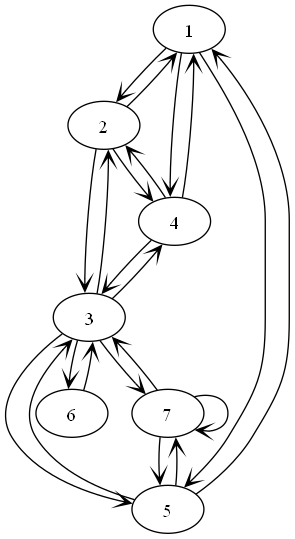

In [83]:
## Just black

# Create a new graph
dot = graphviz.Digraph()

# Add the intersections as nodes to the graph
for i in range(len(Intersection_set_draw)):
    dot.node(str(i+1), str(i+1))

# Add edges between the intersections with arrows
for i, intersection in enumerate(Intersection_set_draw):
    for j in intersection.split(','):
        dot.edge(str(i+1), j, arrowhead='vee')

# Render the graph and display it in the notebook
display(Image(dot.render(format='png')))

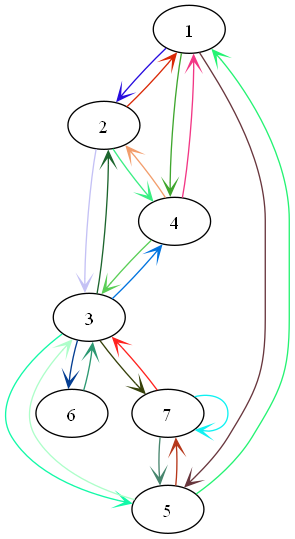

In [84]:
## With colours 

# Create a new graph
dot = graphviz.Digraph()

# Add the intersections as nodes to the graph
for i in range(len(Intersection_set_draw)):
    dot.node(str(i+1), str(i+1))

# Add edges between the intersections with random color arrows
for i, intersection in enumerate(Intersection_set_draw):
    for j in intersection.split(','):
        color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
        dot.edge(str(i+1), j, arrowhead='vee', color=color)

# Render the graph and display it in the notebook
display(Image(dot.render(format='png')))

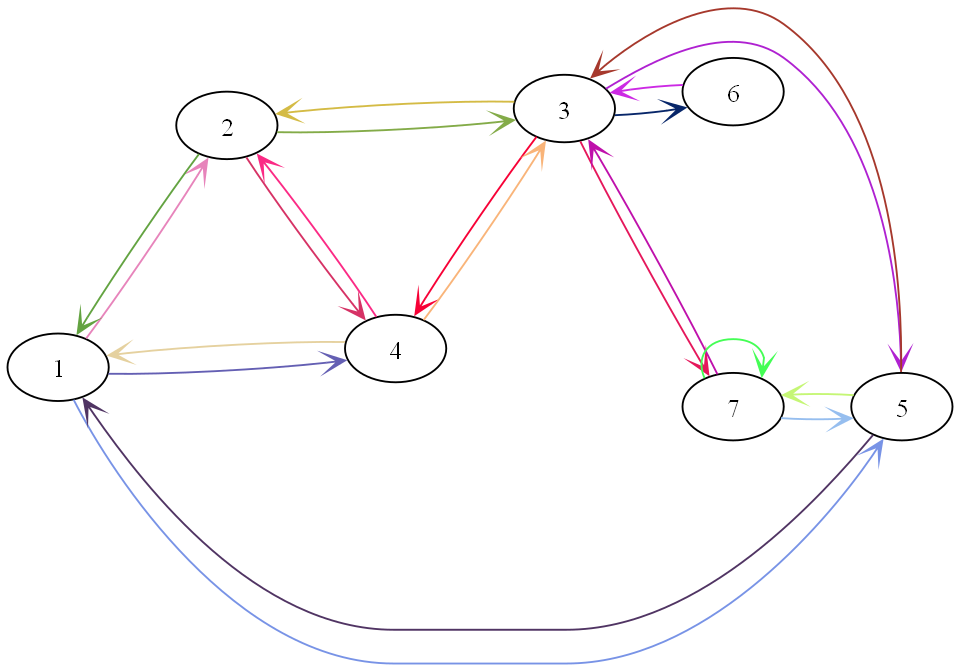

In [85]:

# Create a new graph with square attributes
dot = graphviz.Digraph(graph_attr={'size': '10,10!', 'rankdir': 'LR', 'ratio': '0.5'})

# Add the intersections as nodes to the graph
for i in range(len(Intersection_set_draw)):
    dot.node(str(i+1), str(i+1))

# Add edges between the intersections with random color arrows
for i, intersection in enumerate(Intersection_set_draw):
    for j in intersection.split(','):
        color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
        dot.edge(str(i+1), j, arrowhead='vee', color=color)

# Render the graph and display it in the notebook
display(Image(dot.render(format='png')))


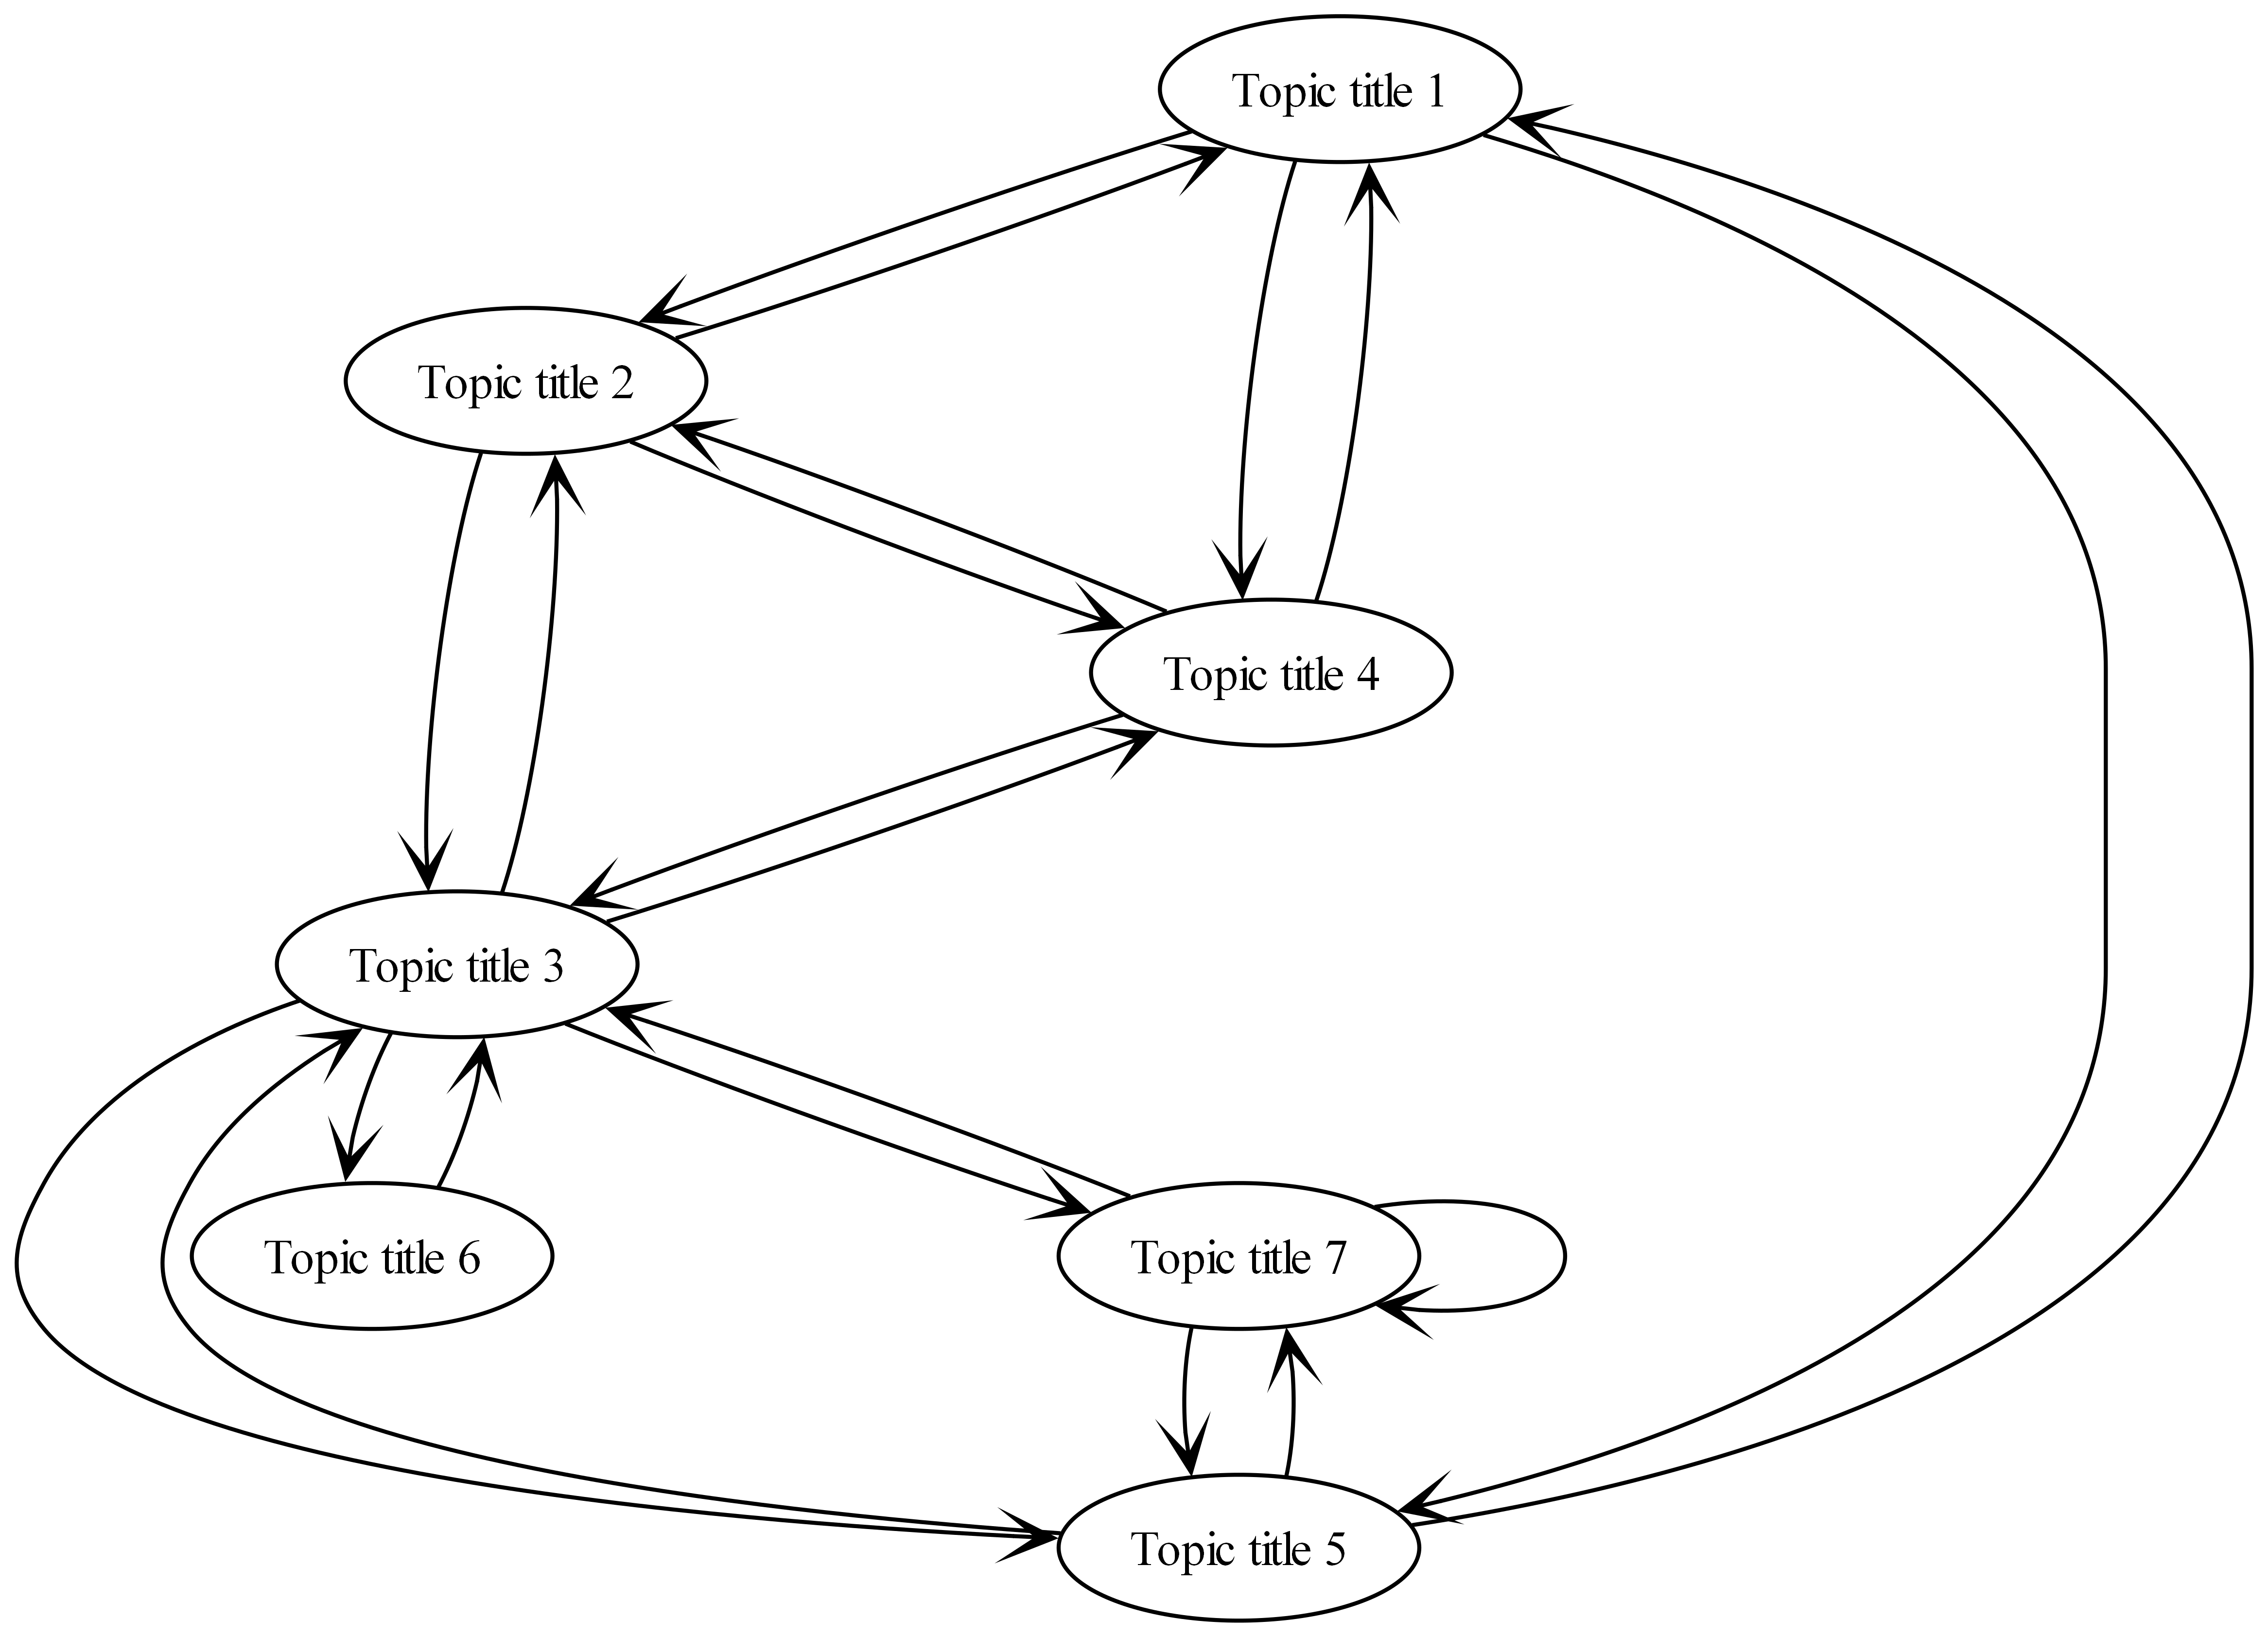

In [86]:
# Create a new graph with specified size in centimeters, reduced node separation, and larger font size
dot = graphviz.Digraph(graph_attr={'size': '12,12', 'rankdir': 'B', 'ratio': '1', 'nodesep': '0.5','dpi':'600'},
                       node_attr={'fontsize': '12'})  # Change the fontsize here

# Add nodes with topics from topics_array
for topic in topics_array:
    dot.node(topic)

# Add edges between the topics with black and white arrows
for i, intersection in enumerate(Intersection_set_draw):
    for j in intersection.split(','):
        color = 'black'
        dot.edge(topics_array[i], topics_array[int(j) - 1], arrowhead='vee', color=color)

# Render the graph and display it in the notebook
#display(Image(dot.render(format='png')))

# Save the output to a file called "digraph.png"
dot.render('digraph', format='png')

# Display the saved image
Image(filename='digraph.png')

## ISM Model

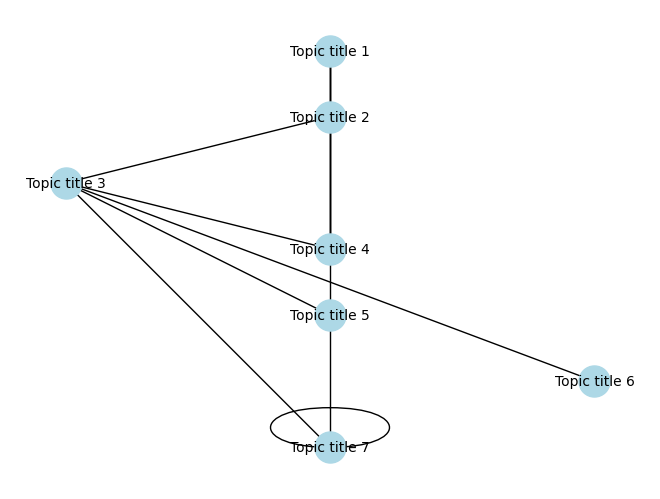

In [87]:
# Create a graph
G = nx.Graph()

# Create nodes with levels
nodes = {}
for i in range(len(topics_array)):
    nodes[topics_array[i]] = {"level": level_array[i]}
    G.add_node(topics_array[i], level=level_array[i])

# Convert Roman numerals to numbers
level_to_number = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5}
level_array_numbers = [level_to_number[level] for level in level_array]

# Parse the Intersection_set_draw and add edges while checking levels
for i, intersections in enumerate(Intersection_set_draw):
    connected_nodes = [topics_array[int(node) - 1] for node in intersections.split(',')]
    for node in connected_nodes:
        if level_array_numbers[i] <= level_array_numbers[topics_array.index(node)]:
            G.add_edge(topics_array[i], node)

# Create a layout with vertical levels
pos = {}
for node in G.nodes():
    level = G.nodes[node]["level"]
    x = level_to_number[level]
    y = -topics_array.index(node)  # Vertical position
    pos[node] = (x, y)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10)

# Add level labels on the left side
for level in set(level_array):
    x_label = min(x for x, y in pos.values()) - 1
    y_label = -topics_array.index([node for node in G.nodes() if G.nodes[node]["level"] == level][0])
    plt.annotate(level, (x_label, y_label), fontsize=12, va="center", ha="center")

# Add this line to save the plot to a high-resolution PNG file
plt.savefig('ISMModel.png', dpi=600)  # Adjust the filename and DPI as needed


plt.show()

#Picture show level 1 from the left, then level 2, then level 3 and so on...
